# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/flynnlives/Documents/GitHub/UCI_DABC_Pharma_Challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/flynnlives/Documents/GitHub/UCI_DABC_Pharma_Challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_num = merged_data.nunique()
mice_num

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_num_dup = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mice_num_dup

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_num_dup_df = merged_data.loc[merged_data["Mouse ID"] == "g989", :]
mice_num_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_data = merged_data[merged_data["Mouse ID"].isin(mice_num_dup)==False]
clean_merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num = clean_merged_data.nunique()
clean_mice_num

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).mean()
median = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).median()
variance = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).var()
std_deviation = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).std()
sem = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).sem()

stat_summary = pd.DataFrame({"Tumor Volume Mean" : mean,
                             "Tumor Volume Median" : median,
                             "Tumor Volume Variance" : variance,
                             "Tumor Volume Std. Dev" : std_deviation,
                             "Total Volume Std. Error" : sem})

stat_summary



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Total Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_merged_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count_per_drug = clean_merged_data["Drug Regimen"].value_counts()
mouse_count_per_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

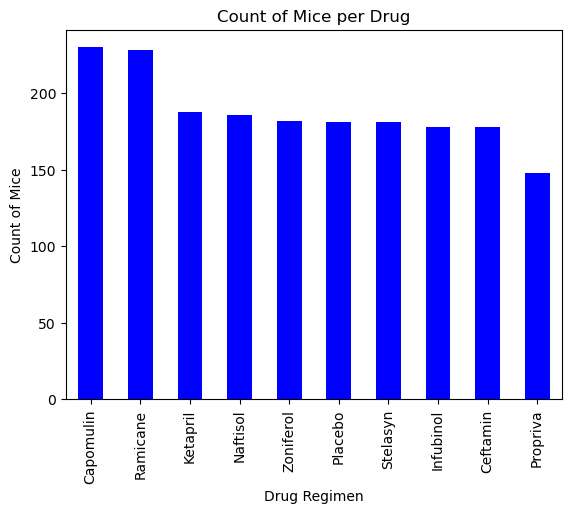

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart = mouse_count_per_drug.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.title("Count of Mice per Drug")
plt.show()

In [14]:
clean_merged_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

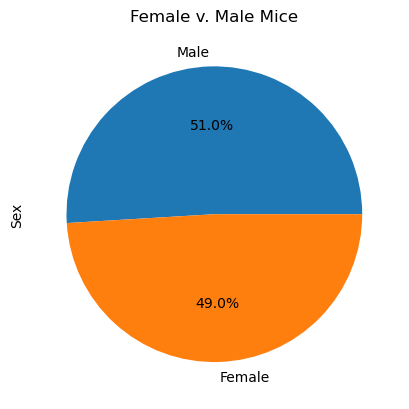

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart = clean_merged_data["Sex"].value_counts()
plt.title("Female v. Male Mice")
pie_chart.plot.pie(autopct="%1.1f%%")
plt.show()


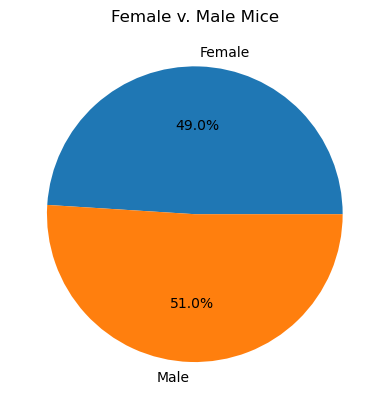

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
tags = ["Female", "Male"]
slices = [49,51]
plt.pie(slices, labels=tags, autopct="%1.1f%%")
plt.title("Female v. Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
clean_merged_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
end_timepoint = clean_merged_data.groupby(["Mouse ID"])["Timepoint"].max()
end_timepoint_df = pd.DataFrame(end_timepoint)
                                                                     
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
end_df = pd.merge(clean_merged_data, end_timepoint_df, on=("Mouse ID", "Timepoint"), how="right")

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumor = []
Ramicane_tumor = []
Infubinol_tumor = []
Ceftamin_tumor = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in end_df.iterrows():
    if row["Drug Regimen"] == treatment_list[0]:
        Capomulin_tumor.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_list[1]:
        Ramicane_tumor.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_list[2]:
        Infubinol_tumor.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_list[3]:
        Ceftamin_tumor.append(row['Tumor Volume (mm3)'])

    # add subset 
treatment_df = pd.DataFrame({
                       treatment_list[0]: Capomulin_tumor,
                       treatment_list[1]: Ramicane_tumor,
                       treatment_list[2]: Infubinol_tumor,
                       treatment_list[3]: Ceftamin_tumor
                       })

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
Capomulin_quartiles = treatment_df[treatment_list[0]].quantile([.25, .5, .75])
lower = [.25]
mid = Capomulin_quartiles[.5]
upper = Capomulin_quartiles[.75]
iqr = upper-lower
lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
max = treatment_df[treatment_list[0]].max()
min = treatment_df[treatment_list[0]].min()

In [21]:
Ramicane_quartiles = treatment_df[treatment_list[1]].quantile([.25, .5, .75])
lower_r = Ramicane_quartiles[.25]
mid_r = Ramicane_quartiles[.5]
upper_r = Ramicane_quartiles[.75]
iqr_r = upper_r-lower_r
lower_bound_r = lower_r - (1.5*iqr_r)
upper_bound_r = upper_r + (1.5*iqr_r)
max_r = treatment_df[treatment_list[1]].max()
min_r = treatment_df[treatment_list[1]].min()

In [22]:
Infubinol_quartiles = treatment_df[treatment_list[2]].quantile([.25, .5, .75])
lower_i = Infubinol_quartiles[.25]
mid_i = Infubinol_quartiles[.5]
upper_i = Infubinol_quartiles[.75]
iqr_i = upper_i-lower_i
lower_bound_i = lower_i - (1.5*iqr_i)
upper_bound_i = upper_i + (1.5*iqr_i)
max_i = treatment_df[treatment_list[2]].max()
min_i = treatment_df[treatment_list[2]].min()


In [23]:
Ceftamin_quartiles = treatment_df[treatment_list[3]].quantile([.25, .5, .75])
lower_c = Ceftamin_quartiles[.25]
mid_c = Ceftamin_quartiles[.5]
upper_c = Ceftamin_quartiles[.75]
iqr_c = upper_c-lower_c
lower_bound_c = lower_c - (1.5*iqr_c)
upper_bound_c = upper_c + (1.5*iqr_c)
max_c = treatment_df[treatment_list[3]].max()
min_c = treatment_df[treatment_list[3]].min()

In [24]:
# Determine outliers using upper and lower bounds
outliers_df = pd.DataFrame({'Drug' : treatment_list,
                            'Lower Quartile' : [lower, lower_r, lower_i, lower_c],
                            'Upper Quartile' : [upper, upper_r, upper_i, upper_c],
                            'IQR' : [iqr, iqr_r, iqr_i, iqr_c],
                            'Median' : [mid, mid_r, mid_i, mid_c],
                            'Upper Bound' : [upper_bound, upper_bound_r, upper_bound_i, upper_bound_c],
                            'Lower Bound' : [lower_bound, lower_bound_r, lower_bound_i, lower_bound_c],
                            'Max' : [max, max_r, max_i, max_c],
                            'Min' : [min, min_r, min_i, min_c]})

outliers_df
outliers_group_df = outliers_df.groupby("Drug")
outliers_group_df.head()


,Drug,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
0,Capomulin,[0.25],40.159220,[39.9092203],38.125164,[100.02305075000001],[-59.61383045],47.685963,23.343598
1,Ramicane,31.56047,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126
2,Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.35545,68.923185,45.000000


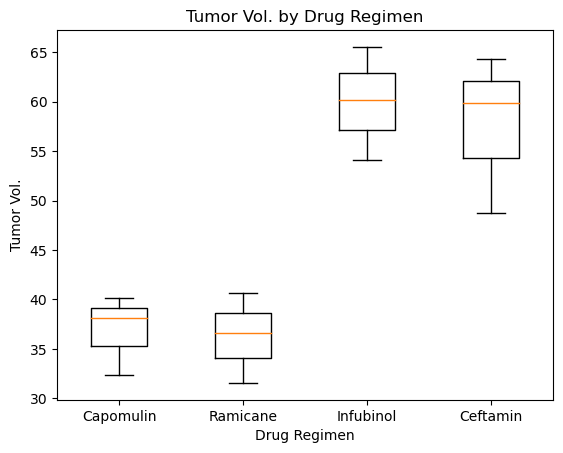

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_data_plot = [Capomulin_quartiles, Ramicane_quartiles, Infubinol_quartiles, Ceftamin_quartiles]

figl, axl = plt.subplots()
axl.set_title("Tumor Vol. by Drug Regimen")
axl.set_ylabel("Tumor Vol.")
axl.set_xlabel("Drug Regimen")
axl.boxplot(treatment_data_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.savefig("Boxplot")
plt.show()

## Line and Scatter Plots

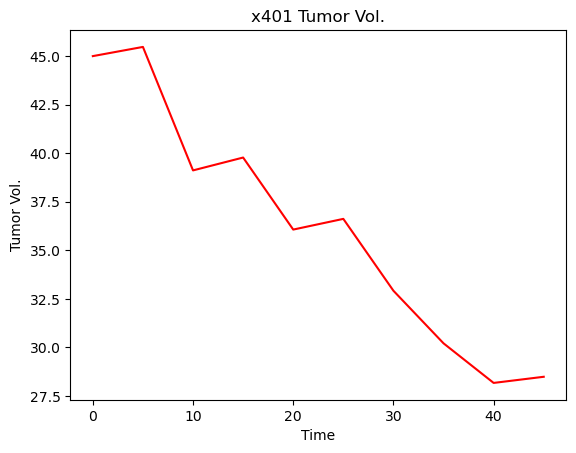

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = clean_merged_data.loc[(clean_merged_data["Mouse ID"] == "x401")]
line_plot = line_plot.set_index("Timepoint")
line_plot

line_plot["Tumor Volume (mm3)"].plot(color="red")
plt.title("x401 Tumor Vol.")
plt.xlabel("Time")
plt.ylabel("Tumor Vol.")
plt.show()


/var/folders/3c/pnxs9sq925115jh4gz7_xnhr0000gn/T/ipykernel_24358/3133898730.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()


Text(0.5, 1.0, 'Weight vs. Tumor Vol.')

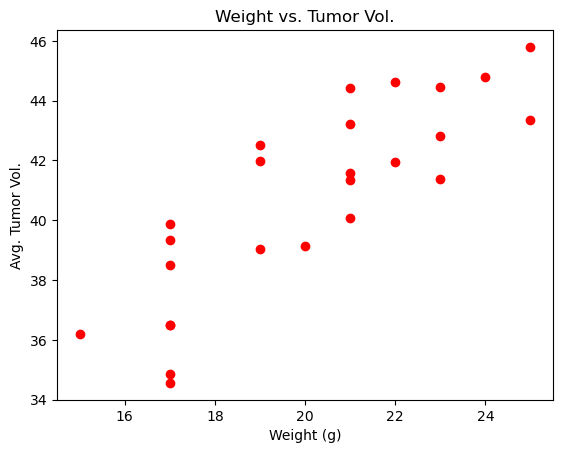

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot = clean_merged_data.loc[(clean_merged_data["Drug Regimen"] == "Capomulin")]
scatter_plot

scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
scatter_plot_df

weight_plot = scatter_plot_df["Weight (g)"]
vol_plot = scatter_plot_df["Tumor Volume (mm3)"]

plt.scatter(weight_plot, vol_plot, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Vol.")
plt.title("Weight vs. Tumor Vol.")

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(weight_plot, vol_plot)
correlation_coefficient

PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712393e-07)

In [43]:
linear_regression = st.linregress(scatter_plot_df["Weight (g)"], scatter_plot_df["Tumor Volume (mm3)"])
linear_regression

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

/var/folders/3c/pnxs9sq925115jh4gz7_xnhr0000gn/T/ipykernel_24358/853571579.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()


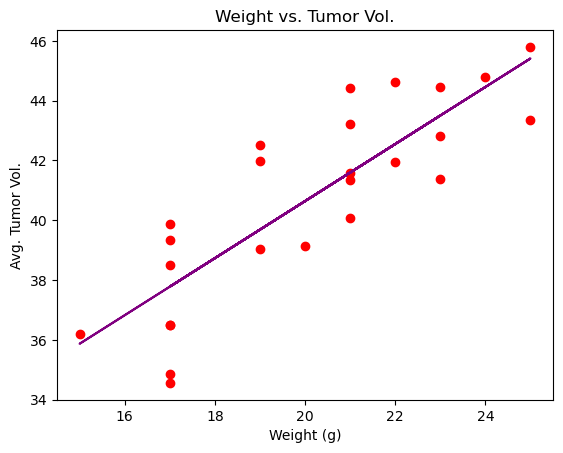

In [49]:
(slope, intercept, r_value, p_value, std_err) = st.linregress(weight_plot, vol_plot)
yvalue = weight_plot * slope + intercept
scatter_plot = clean_merged_data.loc[(clean_merged_data["Drug Regimen"] == "Capomulin")]
scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
weight_plot = scatter_plot_df["Weight (g)"]
vol_plot = scatter_plot_df["Tumor Volume (mm3)"]
plt.scatter(weight_plot, vol_plot, color="red")
plt.plot(weight_plot, yvalue, color="purple")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Vol.")
plt.title("Weight vs. Tumor Vol.")
plt.show()